In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio

In [2]:
tolong_sebut = [i for i in os.listdir('tolong-sebut') if '.wav' in i]
random_voice = 'tolong-sebut/' + tolong_sebut[0]

In [3]:
Audio(random_voice)

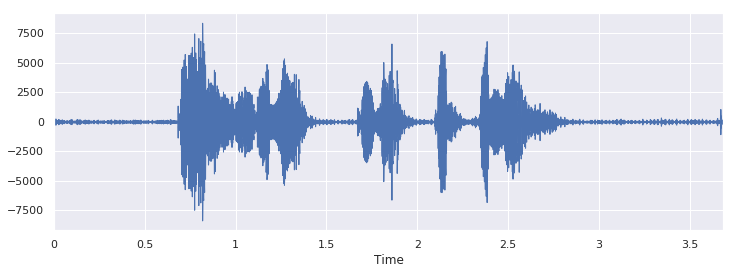

In [5]:
sample_rate, samples = scipy.io.wavfile.read(random_voice)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


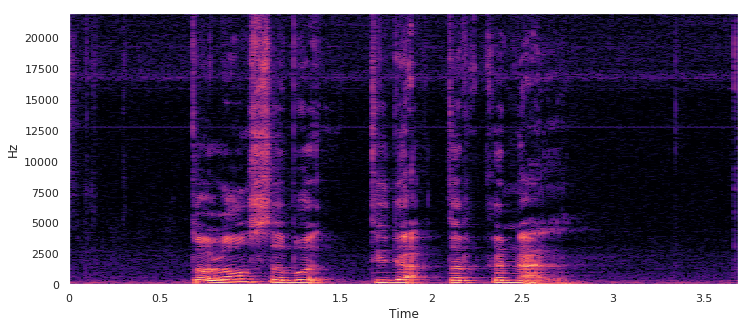

In [6]:
X = librosa.stft(samples.astype('float'))
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

## Change pitch and speed

In [8]:
y_pitch_speed = samples.copy()
# you can change low and high here
length_change = np.random.uniform(low=0.8, high = 1)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]
Audio(y_pitch_speed, rate=sample_rate)

resample length_change =  0.9377113223621851


## Change pitch only

In [10]:
y_pitch = samples.copy()
bins_per_octave = 12
pitch_pm = 1
pitch_change =  pitch_pm * 2*(np.random.uniform())   
print("pitch_change = ",pitch_change)
y_pitch = librosa.effects.pitch_shift(y_pitch.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
Audio(y_pitch, rate=sample_rate)

pitch_change =  1.4400222816668877


## Change speed only

In [11]:
y_speed = samples.copy()
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)
tmp = librosa.effects.time_stretch(y_speed.astype('float64'), speed_change)
minlen = min(y_speed.shape[0], tmp.shape[0])
y_speed *= 0 
y_speed[0:minlen] = tmp[0:minlen]
Audio(y_speed, rate=sample_rate)

speed_change =  0.9627412317450447


## Change amplitude

In [12]:
y_aug = samples.copy()
dyn_change = np.random.uniform(low=1.5,high=3)
print("dyn_change = ",dyn_change)
y_aug = y_aug * dyn_change
print(y_aug[:50])
print(samples[:50])
Audio(y_aug, rate=sample_rate)

dyn_change =  2.6351266402713245
[-163.3778517   -57.97278609   52.70253281 -223.98576442  184.45886482
   -7.90537992 -324.12057675    5.27025328   89.59430577 -110.67531889
 -231.89114434  -47.43227952 -318.85032347   18.44588648  105.40506561
  -86.95917913  108.04019225 -363.64747636  400.53924932 -105.40506561
 -437.43102229  405.8095026  -176.5534849  -105.40506561  252.97215747
  139.66171193   79.05379921 -202.9047513   192.36424474 -197.63449802
  131.75633201  131.75633201   50.06740617 -231.89114434 -115.94557217
  524.39020141 -295.13418371 -279.32342387  355.74209644 -548.10634118
  184.45886482   79.05379921   86.95917913   52.70253281 -363.64747636
  252.97215747 -426.89051572   34.25664632   36.89177296 -216.0803845 ]
[ -62  -22   20  -85   70   -3 -123    2   34  -42  -88  -18 -121    7
   40  -33   41 -138  152  -40 -166  154  -67  -40   96   53   30  -77
   73  -75   50   50   19  -88  -44  199 -112 -106  135 -208   70   30
   33   20 -138   96 -162   13   14  -82]


## add distribution noise

In [14]:
y_noise = samples.copy()
# you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
noise_amp = 0.005*np.random.uniform()*np.amax(y_noise)
y_noise = y_noise.astype('float64') + noise_amp * np.random.normal(size=y_noise.shape[0])
Audio(y_noise, rate=sample_rate)

## random shifting

In [15]:
y_shift = samples.copy()
timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
print("timeshift_fac = ",timeshift_fac)
start = int(y_shift.shape[0] * timeshift_fac)
print(start)
if (start > 0):
    y_shift = np.pad(y_shift,(start,0),mode='constant')[0:y_shift.shape[0]]
else:
    y_shift = np.pad(y_shift,(0,-start),mode='constant')[0:y_shift.shape[0]]
Audio(y_shift, rate=sample_rate)

timeshift_fac =  -0.19732704928986355
-32072


## apply hpss

In [16]:
y_hpss = librosa.effects.hpss(samples.astype('float64'))
print(y_hpss[1][:10])
print(samples[:10])
Audio(y_hpss[1], rate=sample_rate)

[-43.72609863   8.9633553   46.69944588 -64.29029934  81.84093609
  21.14779482 -79.08786656  20.75516344  52.36151594  14.6534512 ]
[ -62  -22   20  -85   70   -3 -123    2   34  -42]


## stretching

In [21]:
input_length = len(samples)
streching = samples.copy()
random_strech = np.random.uniform(low=0.5, high = 1.3)
print("random_strech = ",random_strech)
streching = librosa.effects.time_stretch(streching.astype('float'), random_strech)
if len(streching) > input_length:
    streching = streching[:input_length]
else:
    streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
Audio(streching, rate=sample_rate)

random_strech =  0.9895252608980629


## shift silent to right

In [23]:
sampling=samples[(samples > 200) | (samples < -200)]
shifted_silent =sampling.tolist()+np.zeros((samples.shape[0]-sampling.shape[0])).tolist()
Audio(shifted_silent, rate=sample_rate)

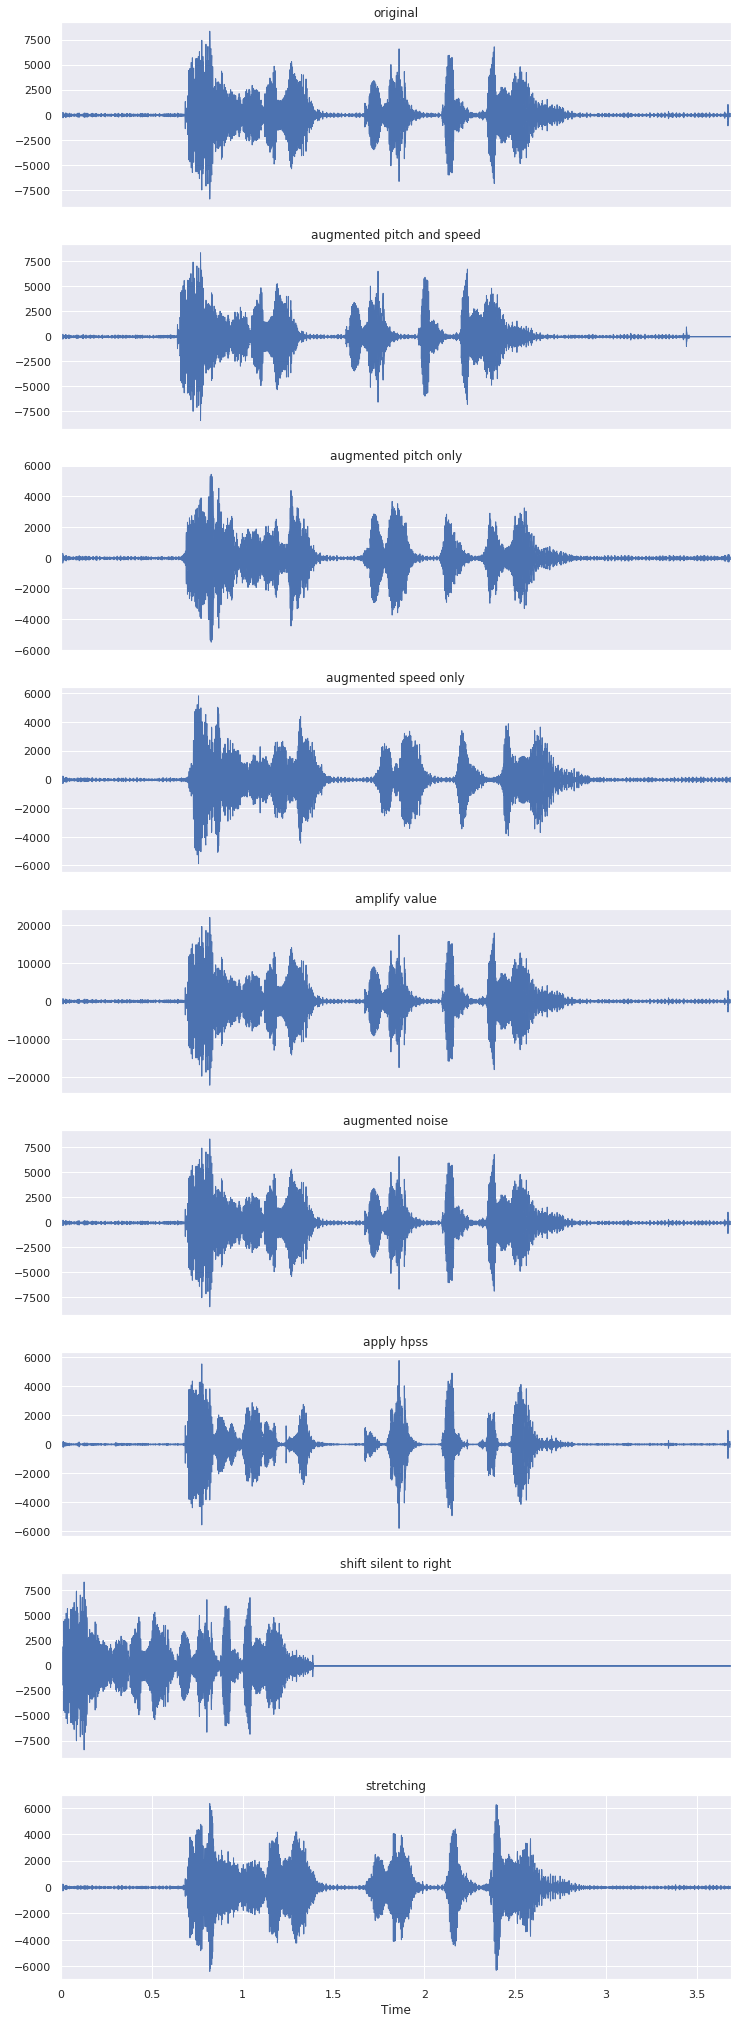

In [24]:
plt.figure(figsize=(12, 4*9))
plt.subplot(9, 1, 1)
librosa.display.waveplot(samples.astype('float'), sr=sample_rate,x_axis=None)
plt.title('original')
plt.subplot(9, 1, 2)
librosa.display.waveplot(y_pitch_speed.astype('float'), sr=sample_rate,x_axis=None)
plt.title('augmented pitch and speed')
plt.subplot(9, 1, 3)
librosa.display.waveplot(y_pitch, sr=sample_rate,x_axis=None)
plt.title('augmented pitch only')
plt.subplot(9, 1, 4)
librosa.display.waveplot(y_speed.astype('float'), sr=sample_rate,x_axis=None)
plt.title('augmented speed only')
plt.subplot(9, 1, 5)
librosa.display.waveplot(y_aug.astype('float'), sr=sample_rate,x_axis=None)
plt.title('amplify value')
plt.subplot(9, 1, 6)
librosa.display.waveplot(y_noise, sr=sample_rate,x_axis=None)
plt.title('augmented noise')
plt.subplot(9, 1, 7)
librosa.display.waveplot(y_hpss[1], sr=sample_rate,x_axis=None)
plt.title('apply hpss')
plt.subplot(9, 1, 8)
librosa.display.waveplot(np.array(shifted_silent).astype('float'), sr=sample_rate,x_axis=None)
plt.title('shift silent to right')
plt.subplot(9, 1, 9)
librosa.display.waveplot(streching, sr=sample_rate)
plt.title('stretching')
plt.show()

In [33]:
def random_augmentation(samples):
    cp = samples.copy()
    if np.random.randint(0, 2):
        length_change = np.random.uniform(low=0.8, high = 1)
        speed_fac = 1.0  / length_change
        print("resample length_change = ",length_change)
        tmp = np.interp(np.arange(0,len(cp),speed_fac),np.arange(0,len(cp)),cp)
        minlen = min(cp.shape[0], tmp.shape[0])
        cp *= 0
        cp[0:minlen] = tmp[0:minlen]
    
    if np.random.randint(0, 2):
        dyn_change = np.random.uniform(low=1.5,high=3)
        print("dyn_change = ",dyn_change)
        cp = cp * dyn_change
    
    if np.random.randint(0, 2):
        noise_amp = 0.005*np.random.uniform()*np.amax(cp)
        cp = cp.astype('float64') + noise_amp * np.random.normal(size=cp.shape[0])
    
    if np.random.randint(0, 2):
        timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)
        print("timeshift_fac = ",timeshift_fac)
        start = int(cp.shape[0] * timeshift_fac)
        if (start > 0):
            cp = np.pad(cp,(start,0),mode='constant')[0:cp.shape[0]]
        else:
            cp = np.pad(cp,(0,-start),mode='constant')[0:cp.shape[0]]
    return cp

In [44]:
random_aug = random_augmentation(samples)
Audio(random_aug, rate=sample_rate)

resample length_change =  0.9862402379772053
dyn_change =  2.2698396966876366


In [50]:
librosa.output.write_wav('augmented.wav', samples.astype('float32'), sample_rate, norm = True)